# Tratamiento de Valores Faltantes sobre datos de NHANES

## Preparacion del entorno

### Librerias

In [2]:
import janitor  # limpiar datos
import matplotlib.pyplot as plt # visualizacion de datos
import missingno    # exploracion de valores faltantes
import nhanes.load  # libreria con los datos a analizar
import numpy as np  # calculos numericos
import pandas as pd # trabajar con dataframe
import scipy.stats  # trabjar con estadisticos
import seaborn as sns   #   visualizacion estadistica
# import session_info
# sklearn contiene los modelos a utilizar
import sklearn.compose
import sklearn.impute
import sklearn.preprocessing
import statsmodels.api as sm
import statsmodels.datasets
import statsmodels.formula.api as smf

from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.kernel_approximation import Nystroem
from sklearn.linear_model import BayesianRidge, Ridge
from sklearn.neighbors import KNeighborsRegressor
from statsmodels.graphics.mosaicplot import mosaic

### Importar funciones personalizadas

In [3]:
%run '../utils2.ipynb'

### Configuracion de las Graficas 

In [4]:
%matplotlib inline

# tamaño de los graficos
sns.set(
    rc={
        'figure.figsize':(8, 6)
    }
)

# estilo de los graficos
sns.set_style('whitegrid')

## Datos preparados: NHANES

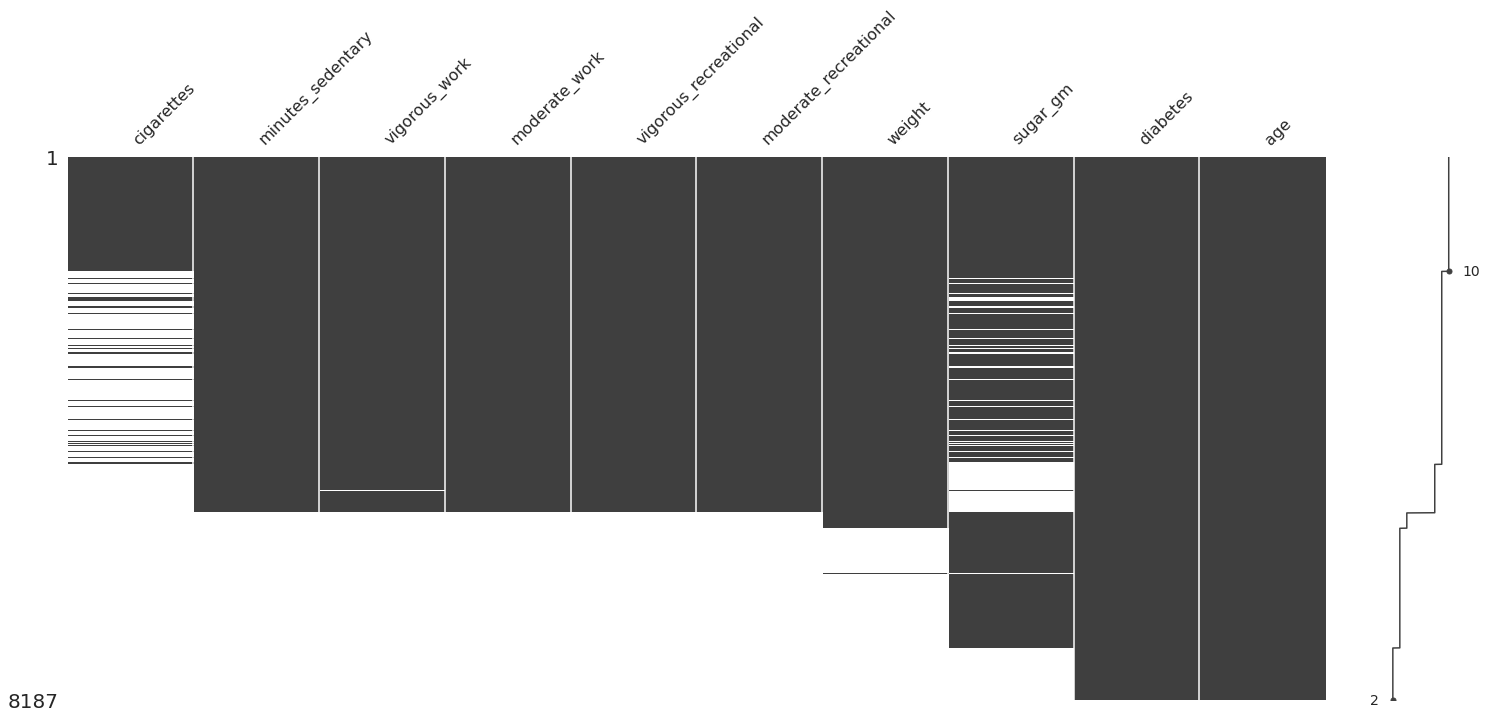

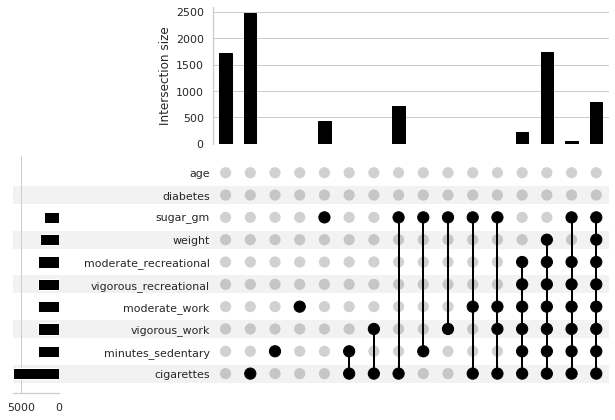

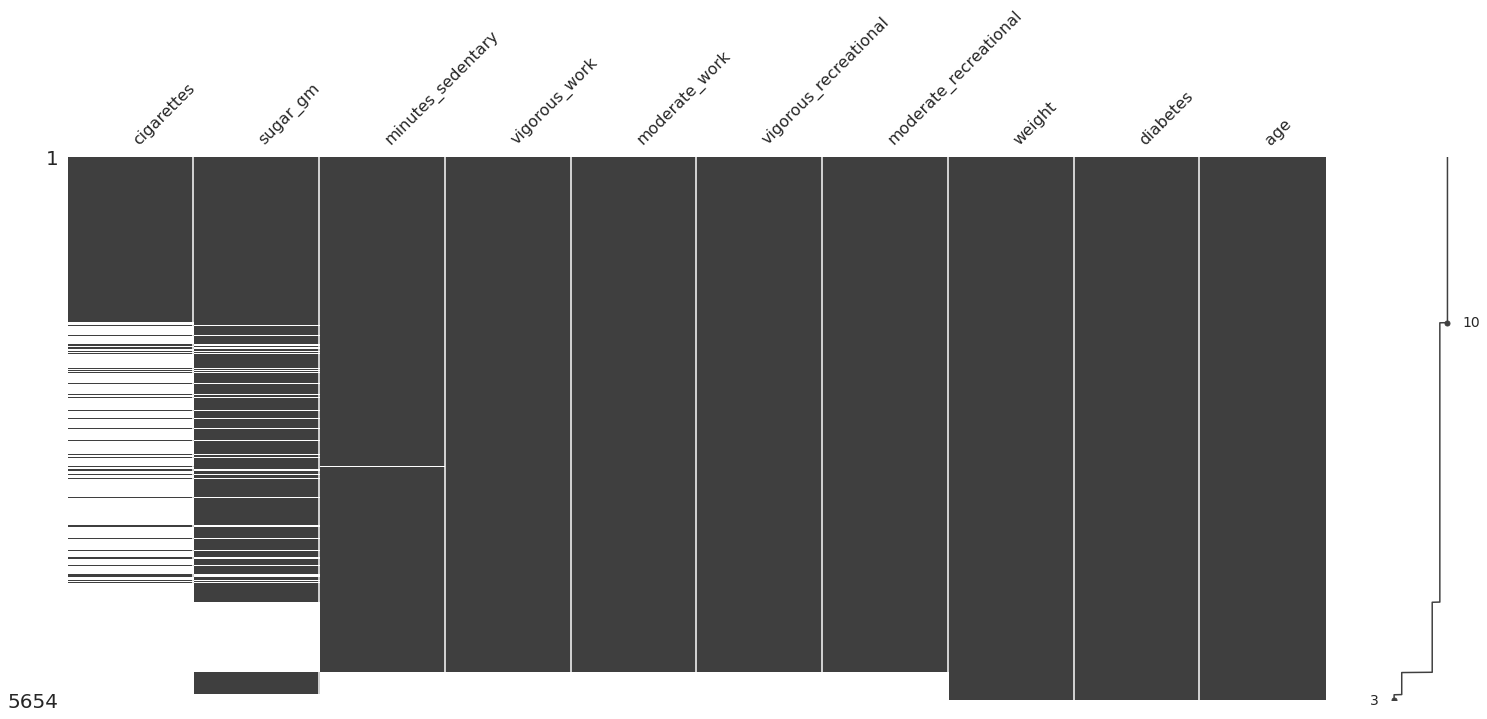

12.25 %


In [5]:
%run descarga_carga_datos.ipynb

## Relacion entre variables categoricas

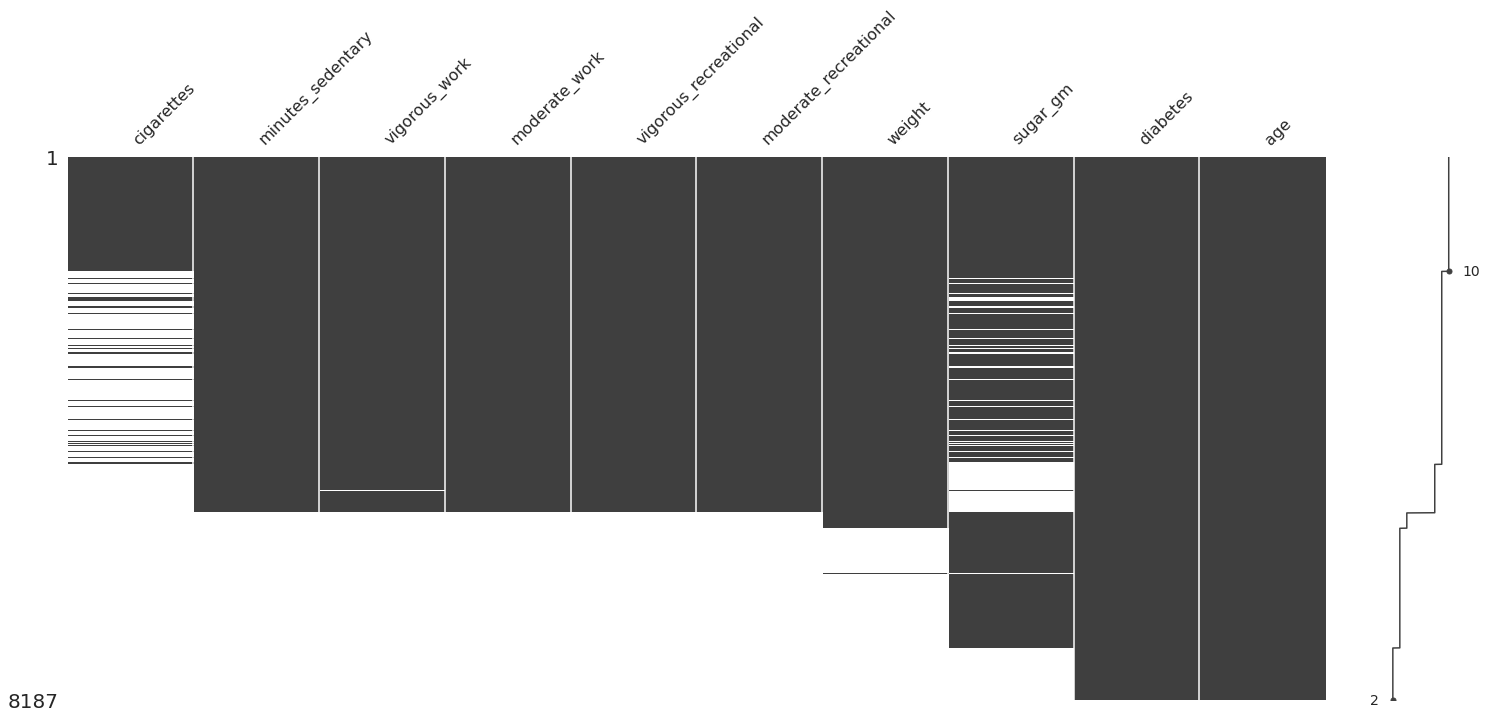

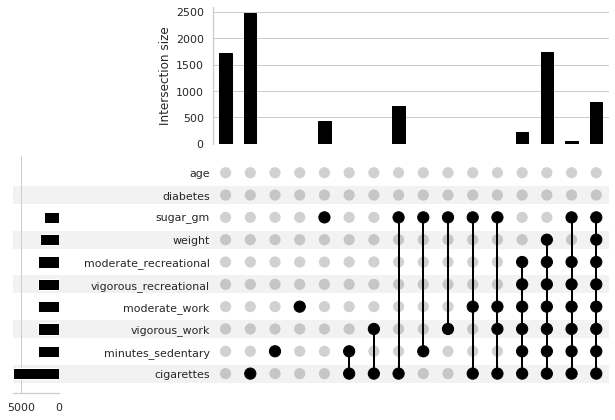

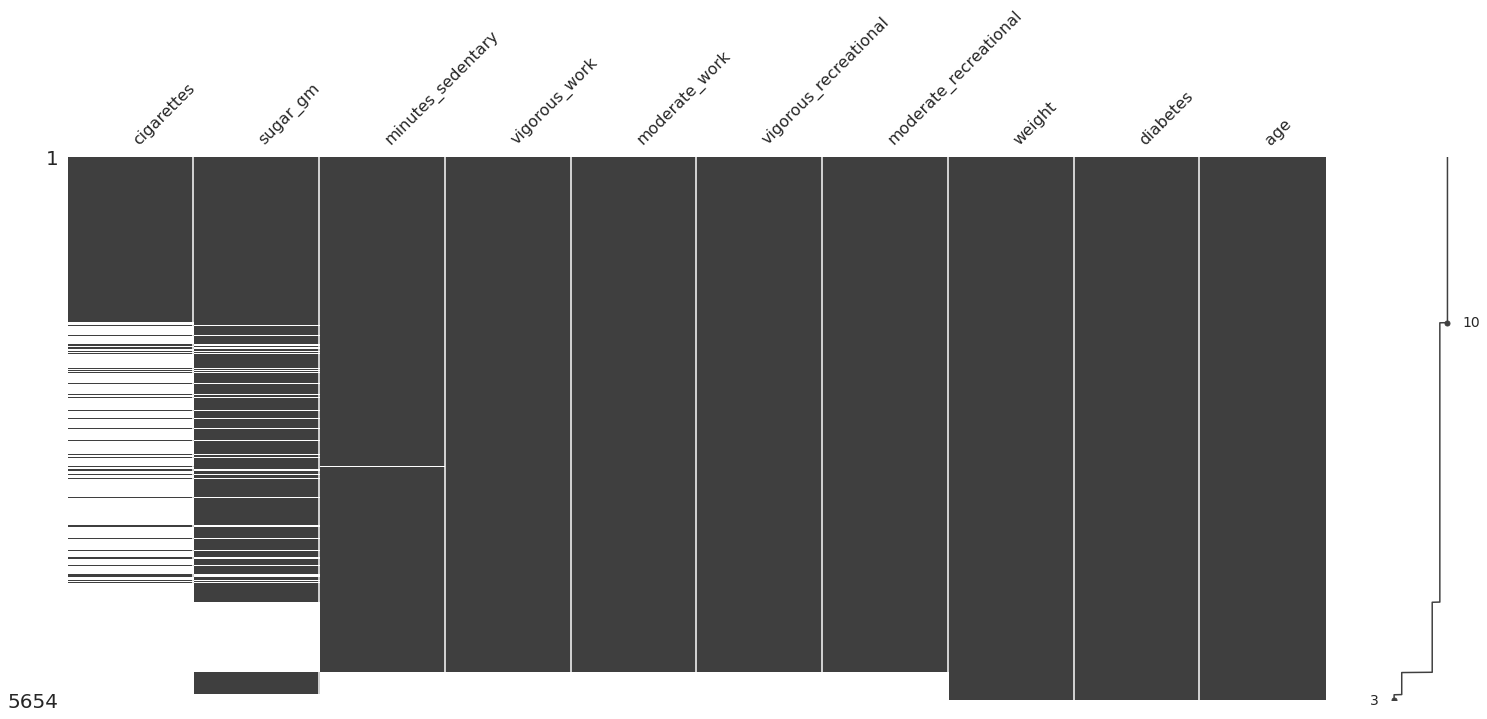

12.25 %


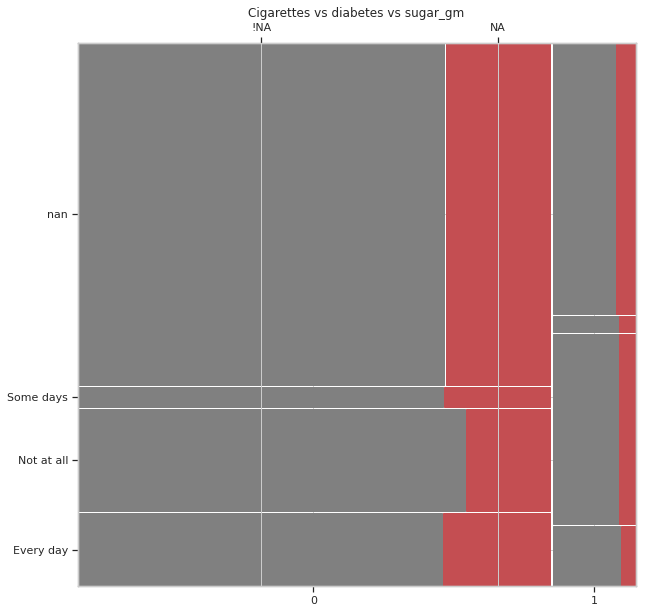

La grafica nos muestra que las personas no diabeticas que fuman 'no todo el tiempo' 
son las que mas respondieron sobre su nivel de azucar en la sangre. 

Ademas, las personas no diabeticas con el habito de fumar 'cada dia' son las que menos informacion 
dieron sobre su nivel de azucar en la sangre.

Las personas diabeticas que admiten que fuman 'algunas veces al dia' son muy pocas. 
Tambien son las que menos informacion dan sobre su nivel de azucar en la sangre. 


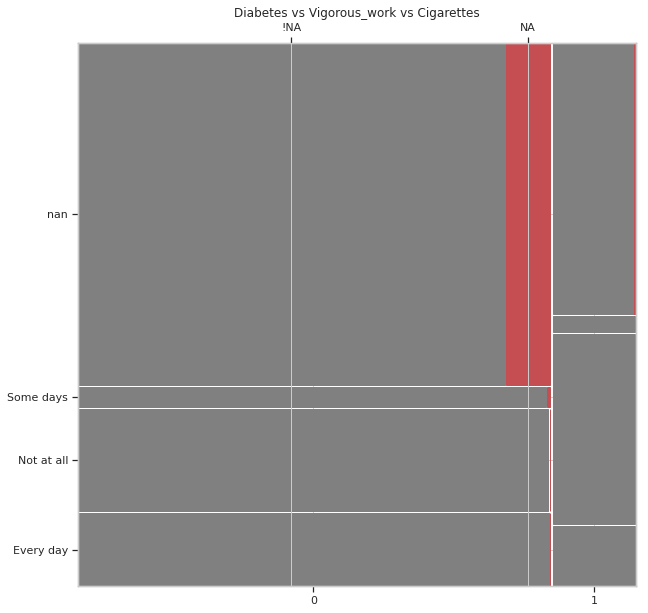

La grafica nos muestra que las personas no diabeticas que no responden sobre su 
condicion de fumador son las que mas omiten la respuestas sobre su estado de vigor en el trabajo. 


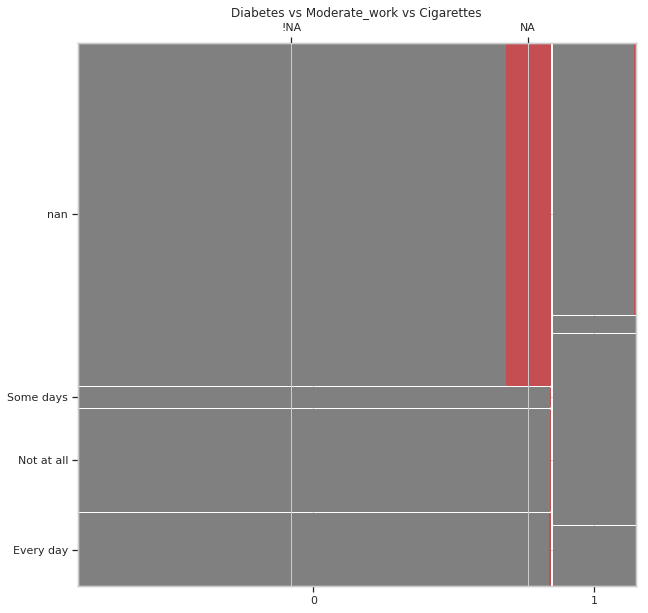

Al igual que el grafico anterior, las personas no diabeticas que no responden sobre 
su condicion de fumador son las que mas omiten su respuesta en cuanto a su actividad moderada 
en el trabajo. 


In [8]:
%run relacion_categoricas.ipynb

## Codificacion de las variables categoricas

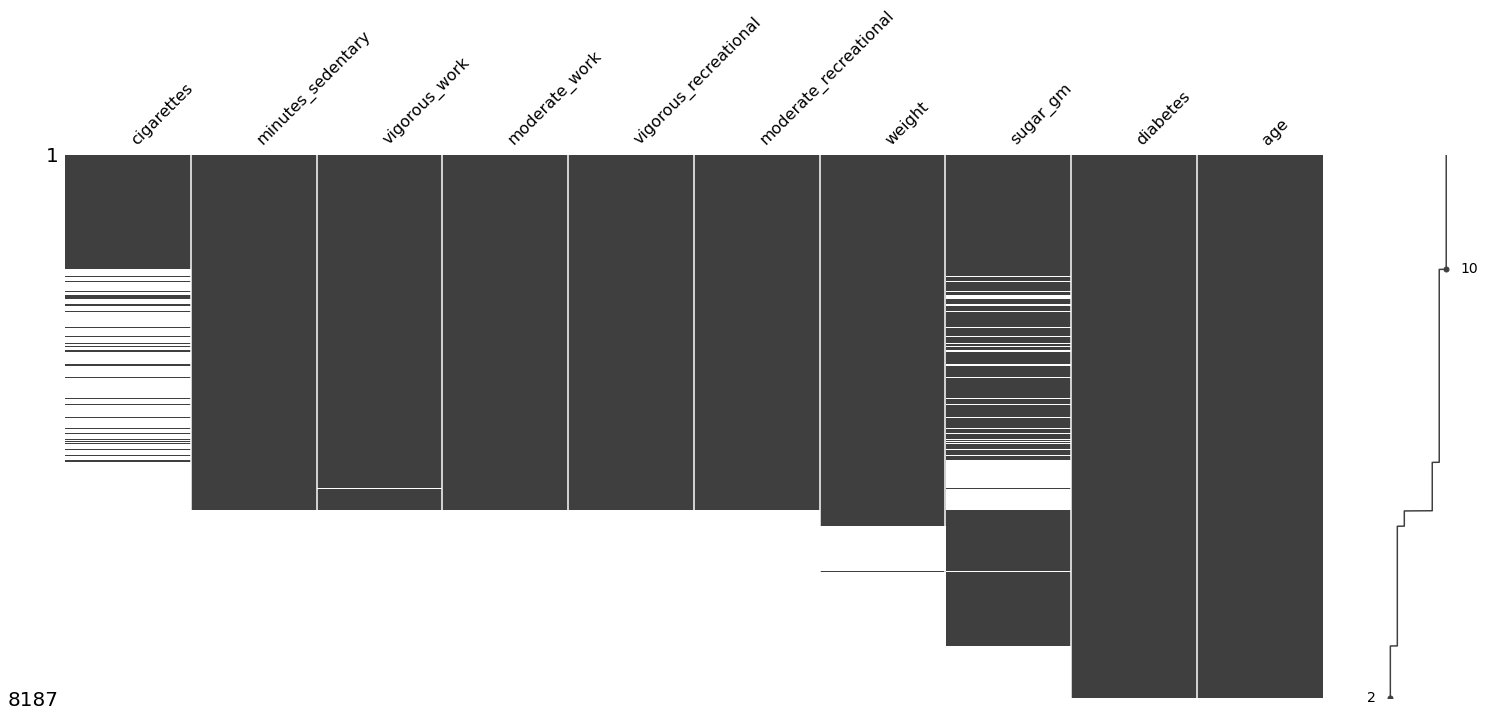

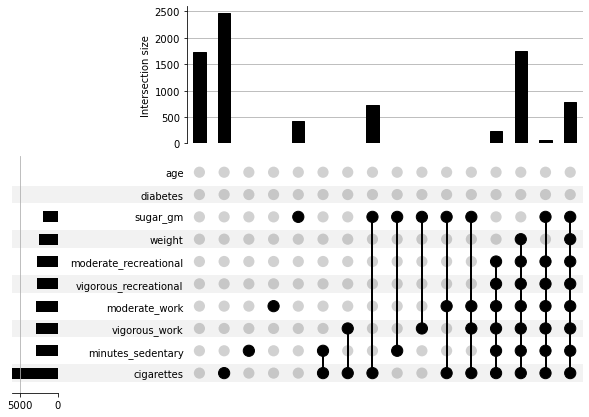

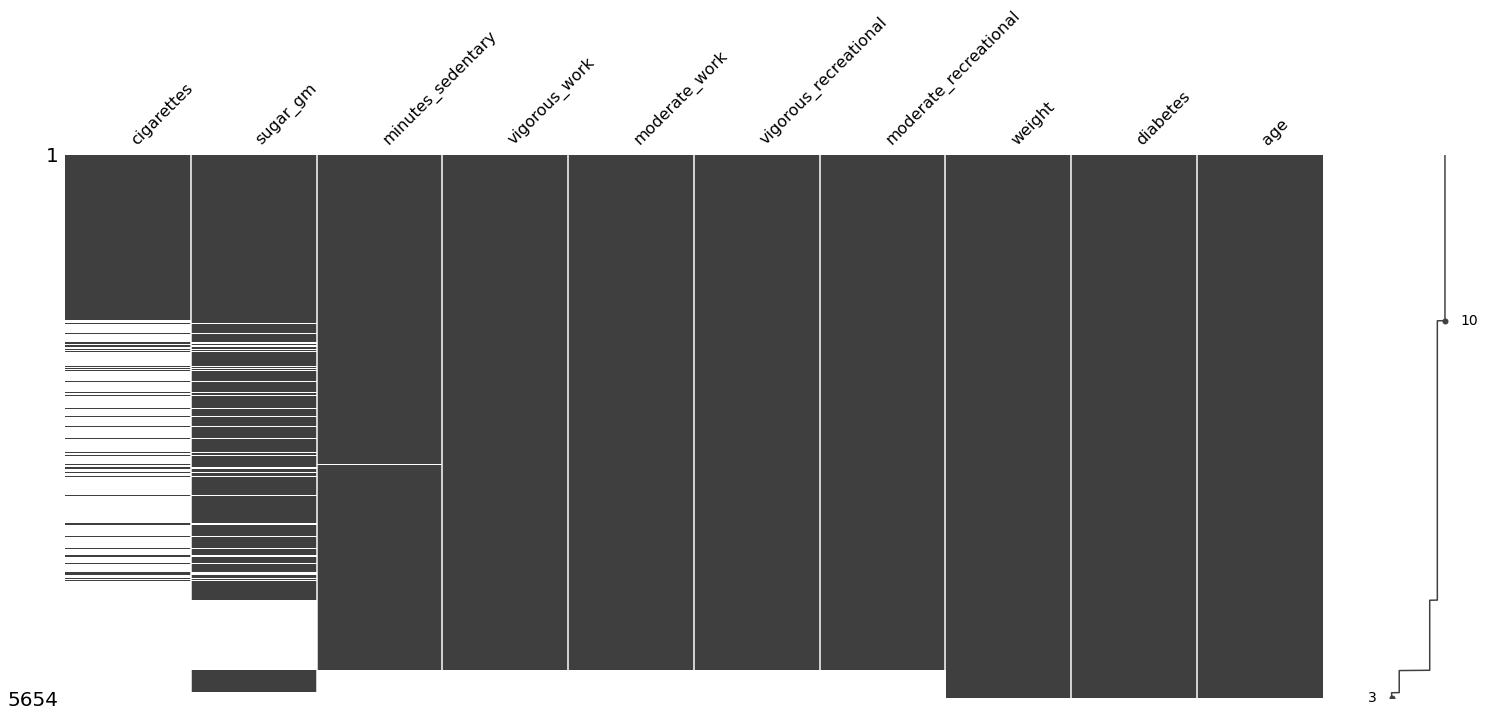

12.25 %


In [1]:
%run tratamiento_v_categoricas.ipynb

## Metodos de Imputacion

### 1. Imputacion de un unico valor

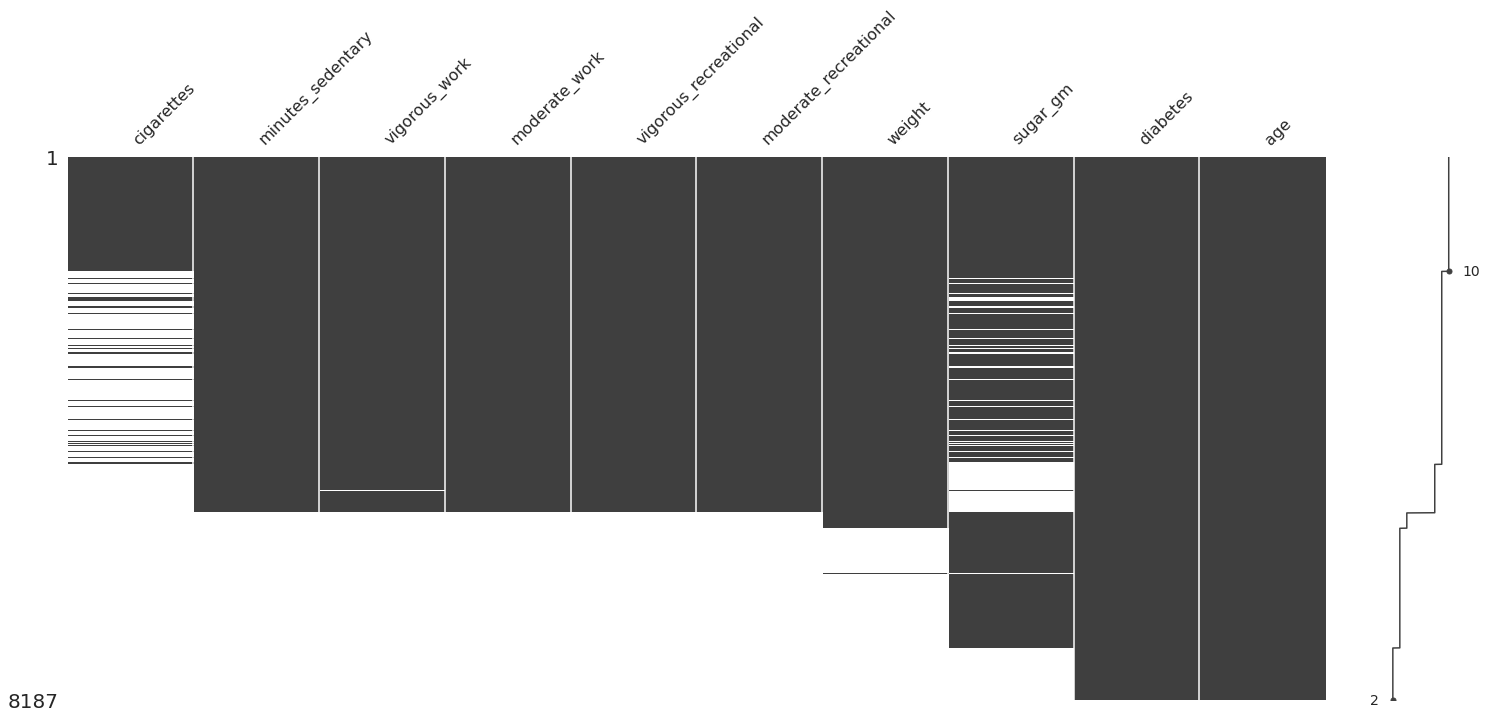

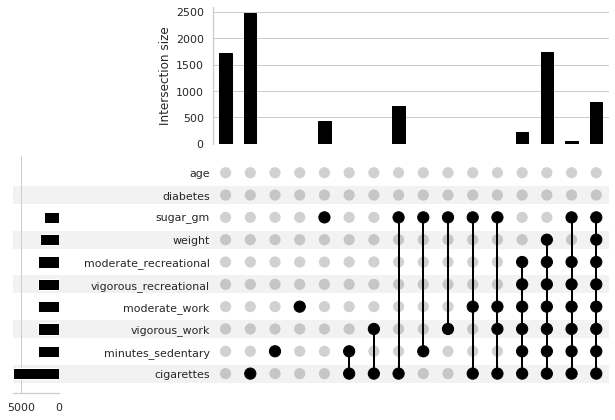

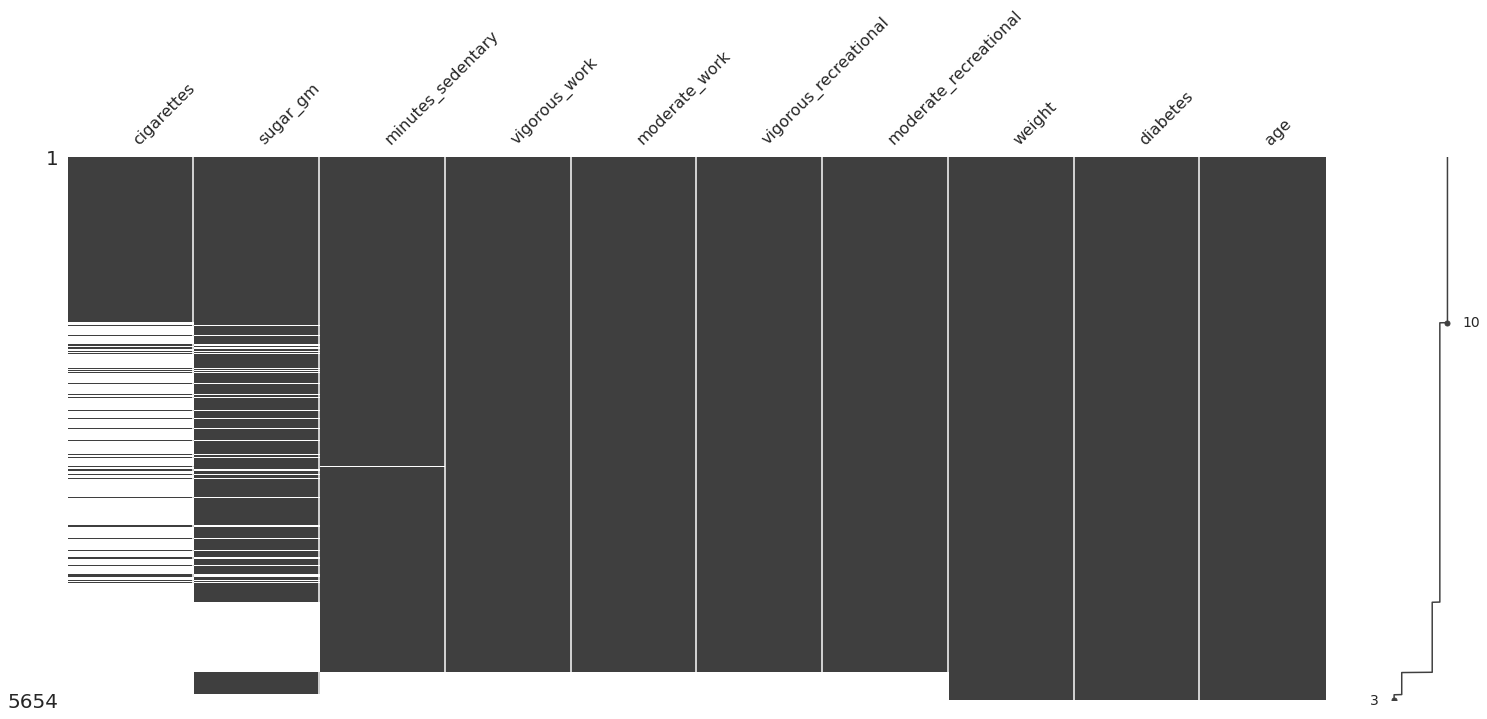

12.25 %


<Figure size 576x576 with 0 Axes>

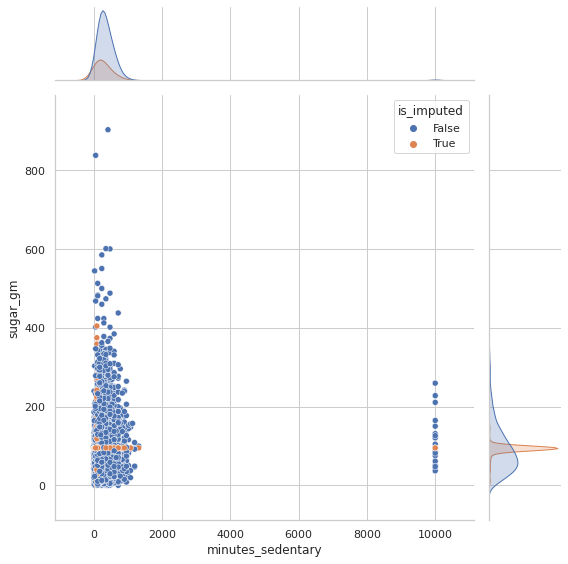

La grafica nos muestra como la distribucion de los valores imputados es 
diferente a la de los datos reales. Los valores imputados se acumulan en una zona 
lo cual rompe con la estructura de la distribucion real. La imputacion no es buena.


In [2]:
%run Imp_unico_valor.ipynb